In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
# Memuat data
file_path = 'world happines report 2021.csv'
data = pd.read_csv(file_path)
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [14]:
# Memilih kolom yang relevan
kolom = [
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]
data_terpilih = data[kolom]

In [5]:
# Analisis Data Eksploratif (EDA)
# Menampilkan statistik dasar
print("Statistik Dasar Data:")
print(data_terpilih.describe())

Statistik Dasar Data:
       Ladder score  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.532839               9.432208        0.814745   
std        1.073924               1.158601        0.114889   
min        2.523000               6.635000        0.463000   
25%        4.852000               8.541000        0.750000   
50%        5.534000               9.569000        0.832000   
75%        6.255000              10.421000        0.905000   
max        7.842000              11.647000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000         

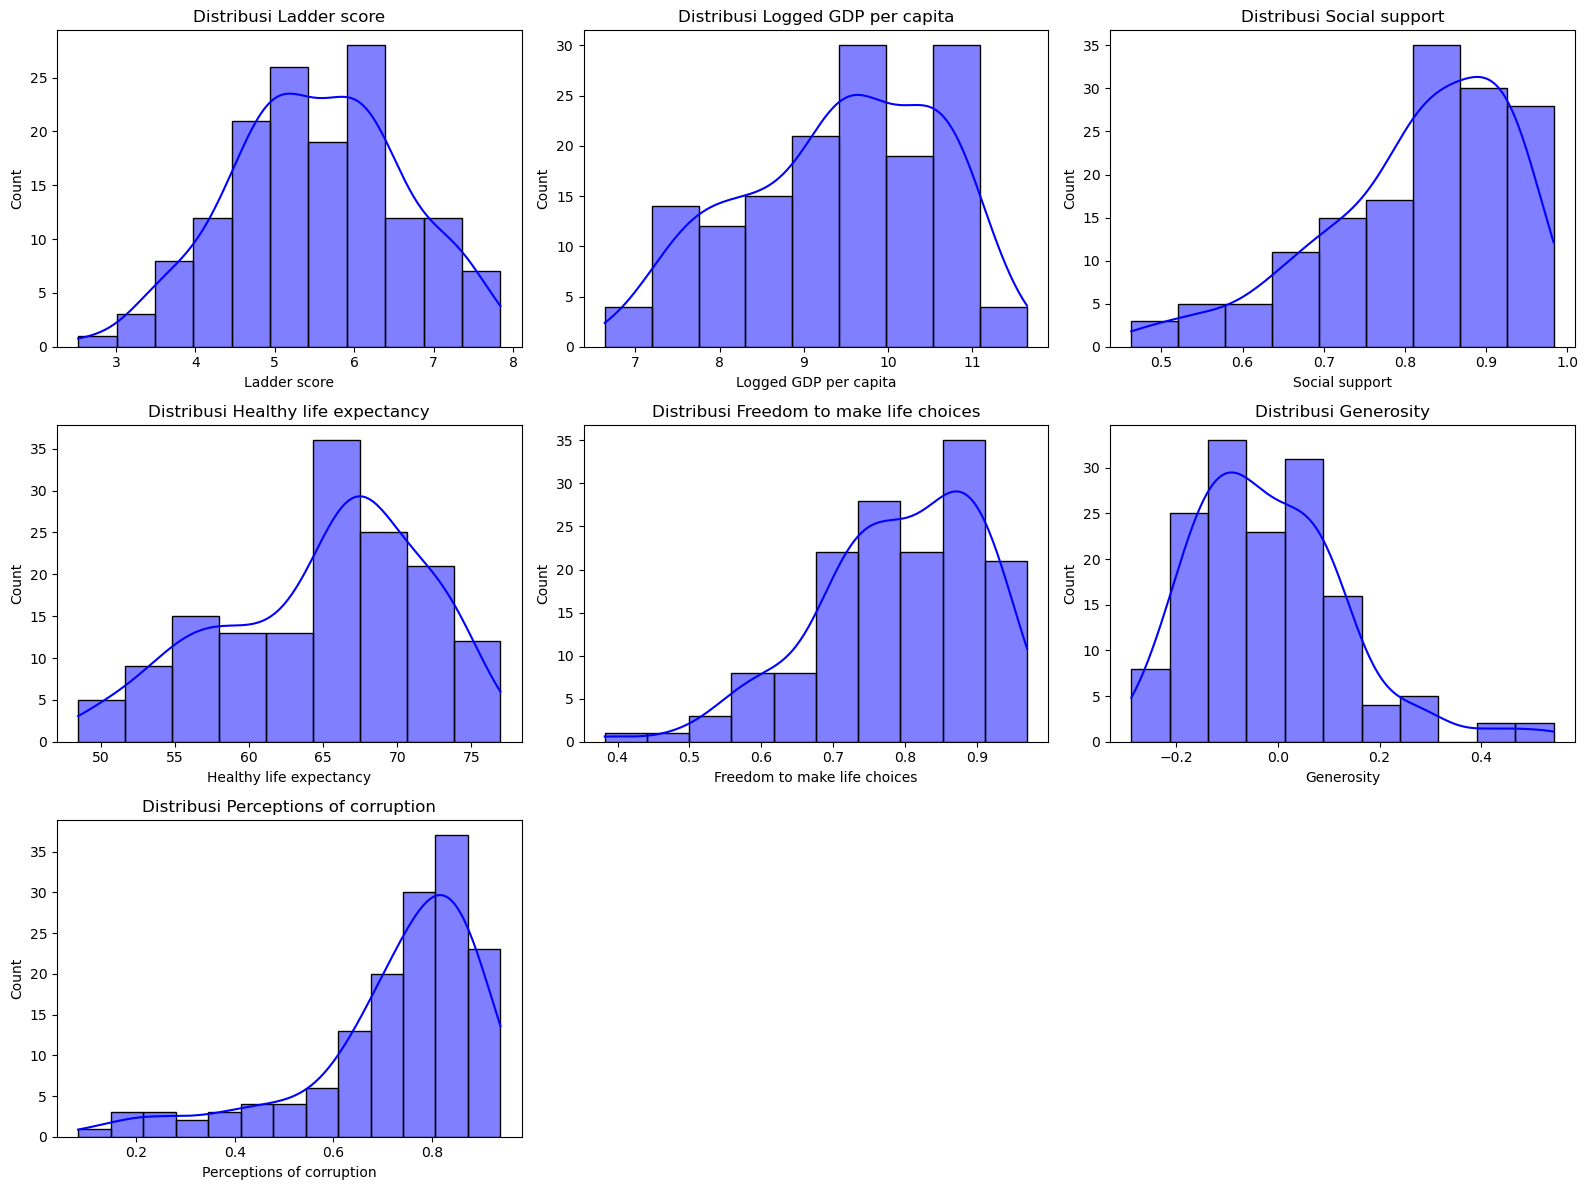

In [6]:
# Plot distribusi untuk setiap fitur
plt.figure(figsize=(16, 12))
for i, kol in enumerate(kolom):
    plt.subplot(3, 3, i+1)
    sns.histplot(data_terpilih[kol], kde=True, color='blue')
    plt.title(f'Distribusi {kol}')
plt.tight_layout()
plt.show()

Berikut interpretasi dari output diatas:

Ladder score: Distribusi skor kebahagiaan menunjukkan bentuk yang mendekati normal, dengan sebagian besar negara memiliki skor kebahagiaan antara 5 dan 7. Hal ini mengindikasikan bahwa, dalam skala global, kebanyakan negara cenderung berada pada tingkat kebahagiaan yang sedang, dengan hanya sedikit negara yang memiliki skor sangat rendah (di bawah 4) atau sangat tinggi (di atas 7). Penyebaran yang agak condong ke kiri menunjukkan bahwa ada lebih banyak negara dengan kebahagiaan yang mendekati tinggi.

Logged GDP per capita: Grafik ini memiliki distribusi yang cenderung simetris, dengan nilai GDP per kapita yang tercatat berkisar antara 8 hingga 10 untuk sebagian besar negara. Penyebaran yang merata menunjukkan bahwa distribusi GDP per kapita cukup seimbang, tanpa kecondongan yang signifikan ke salah satu sisi, yang menandakan variasi ekonomi yang cukup luas di seluruh negara-negara tersebut.

Social support: Distribusi grafik dukungan sosial sangat miring ke kiri, yang berarti bahwa banyak negara memiliki tingkat dukungan sosial yang tinggi, umumnya di atas 0,8. Ini menunjukkan bahwa di berbagai negara, individu cenderung memiliki sistem pendukung yang kuat, seperti keluarga, teman, atau komunitas, yang berperan penting dalam kesejahteraan mereka.

Healthy life expectancy: Harapan hidup sehat menunjukkan distribusi yang hampir normal dengan puncak di sekitar 65 tahun. Sebagian besar negara memiliki harapan hidup sehat yang cukup tinggi, mencerminkan akses yang relatif baik ke layanan kesehatan dan pola hidup sehat di berbagai wilayah. Namun, distribusi juga menunjukkan ada beberapa negara yang tertinggal dengan harapan hidup sehat lebih rendah.

Freedom to make life choices: Grafik ini menunjukkan kecondongan ke kiri dengan puncak distribusi di sekitar 0,8, mengindikasikan bahwa banyak negara memberikan kebebasan yang cukup besar kepada penduduknya untuk membuat keputusan hidup. Hal ini dapat mencerminkan tingkat kebebasan pribadi dan otonomi yang signifikan di sebagian besar negara, meskipun ada juga negara dengan tingkat kebebasan yang lebih rendah.

Generosity: Distribusi kemurahan hati sangat miring ke kanan, menunjukkan bahwa meskipun ada negara yang sangat murah hati, sebagian besar negara memiliki tingkat kemurahan hati yang rendah hingga sedang. Ini bisa menunjukkan bahwa aspek sosial dan budaya yang mendorong kedermawanan tidak merata di seluruh dunia, atau ada faktor lain seperti kondisi ekonomi yang memengaruhi kemampuan individu untuk bersikap dermawan.

Perceptions of corruption: Persepsi tentang korupsi memiliki distribusi yang sangat miring ke kiri, menunjukkan bahwa di banyak negara, penduduk merasa bahwa tingkat korupsi sangat tinggi (nilai di atas 0,7). Ini dapat menunjukkan bahwa ketidakpercayaan terhadap institusi dan pejabat publik adalah hal yang umum, yang berpotensi memengaruhi kebahagiaan dan kesejahteraan secara keseluruhan.

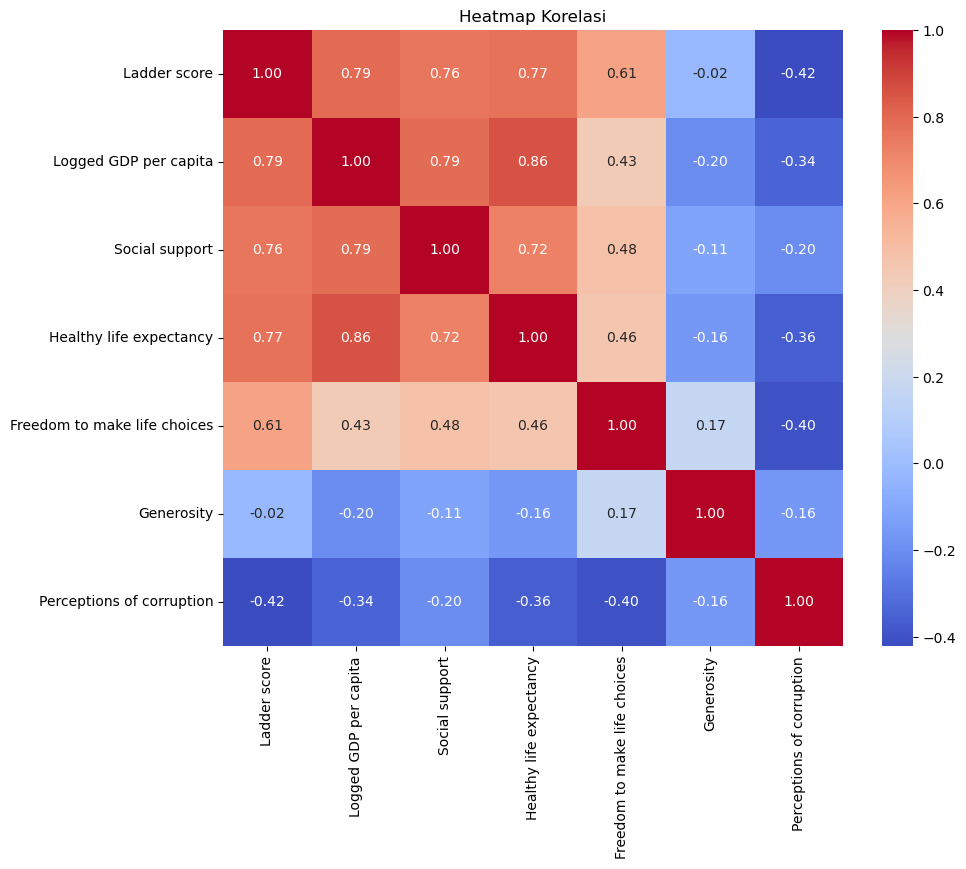

In [7]:
# Heatmap Korelasi
plt.figure(figsize=(10, 8))
matriks_korelasi = data_terpilih.corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

Berikut interpretasi dari output diatas:

Korelasi Positif Tinggi:
-"Ladder score" memiliki korelasi positif yang tinggi dengan "Logged GDP per capita" (0.79), "Social support" (0.76), dan "Healthy life expectancy" (0.77). Ini menunjukkan bahwa kesejahteraan masyarakat (diukur oleh "Ladder score") cenderung meningkat seiring dengan peningkatan GDP, dukungan sosial, dan harapan hidup yang sehat.
-"Logged GDP per capita" juga memiliki korelasi positif tinggi dengan "Healthy life expectancy" (0.86), menunjukkan bahwa negara-negara dengan GDP yang lebih tinggi cenderung memiliki harapan hidup yang lebih baik.

Korelasi Negatif:
-"Perceptions of corruption" memiliki korelasi negatif dengan beberapa variabel, termasuk "Ladder score" (-0.42), "Logged GDP per capita" (-0.34), dan "Freedom to make life choices" (-0.40). Ini menunjukkan bahwa persepsi terhadap korupsi yang lebih tinggi cenderung berhubungan dengan penurunan dalam kesejahteraan masyarakat, GDP, dan kebebasan untuk membuat pilihan hidup.
-"Generosity" tampaknya memiliki korelasi yang relatif lemah dengan sebagian besar variabel, bahkan menunjukkan korelasi negatif kecil dengan "Ladder score" (-0.02), "Logged GDP per capita" (-0.20), dan "Social support" (-0.11).

Korelasi Moderat dan Rendah:
-Beberapa variabel menunjukkan korelasi moderat, seperti "Freedom to make life choices" dengan "Ladder score" (0.61) dan "Social support" (0.48). Korelasi ini tidak terlalu kuat tetapi menunjukkan bahwa faktor-faktor ini tetap berperan dalam kesejahteraan.
-"Generosity" memiliki korelasi yang sangat rendah atau hampir tidak signifikan dengan "Ladder score" dan variabel lain, yang mungkin menunjukkan bahwa variabel ini kurang berpengaruh langsung terhadap kesejahteraan atau dipengaruhi oleh faktor-faktor lain yang tidak diwakili di sini.

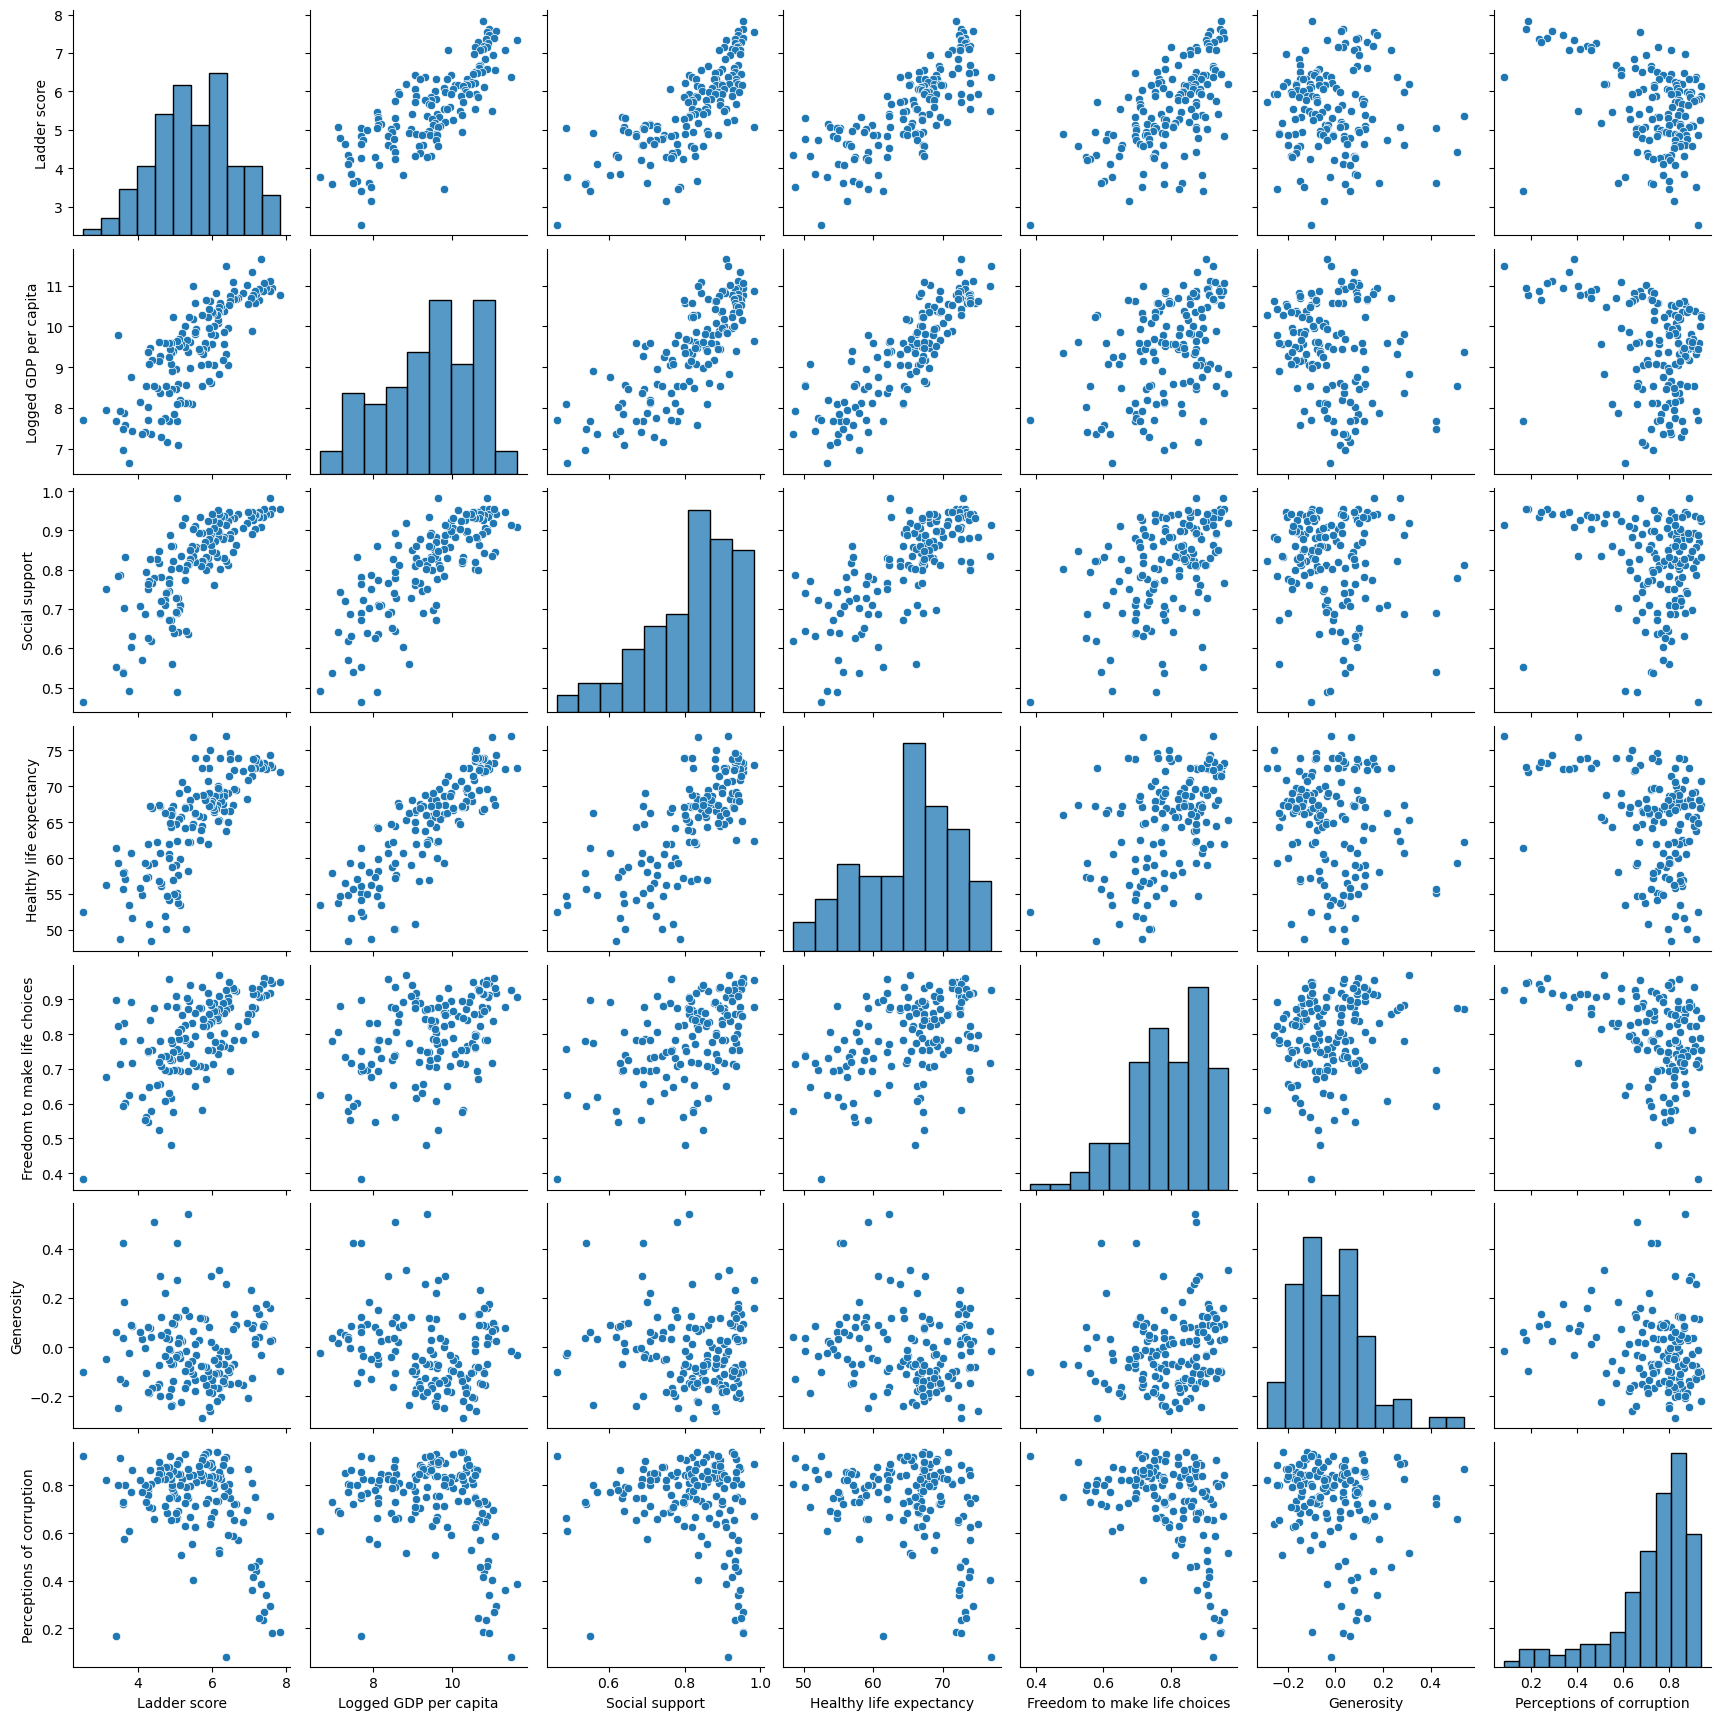

In [9]:
# Pairplot
sns.pairplot(data_terpilih)
plt.show()

# Standarisasi data
scaler = StandardScaler()
data_dinormalisasi = scaler.fit_transform(data_terpilih)

Berikut interpretasi dari output diatas:
Pairplot ini menunjukkan distribusi dan hubungan antar variabel dalam dataset World Happines Index. Terlihat bahwa "Logged GDP per capita", "Social support", dan "Healthy life expectancy" memiliki hubungan positif yang kuat dengan "Ladder score", mengindikasikan bahwa kesejahteraan subjektif cenderung meningkat seiring dengan peningkatan GDP, dukungan sosial, dan harapan hidup. Di sisi lain, variabel seperti "Generosity" dan "Perceptions of corruption" menunjukkan hubungan yang lemah atau negatif dengan kesejahteraan, dengan persepsi terhadap korupsi secara khusus memiliki korelasi negatif terhadap beberapa variabel lain. Pairplot ini juga mengungkapkan variasi distribusi data antar variabel, penting untuk dipertimbangkan dalam analisis lanjutan.